## Batch Gradient Descent

Soft-margin Loss function:
$$L = \lambda \left\|w \right\|^{2} + \frac{1}{n} \sum_{i=1}^{n} max\left\{0, 1- y_{i}\left ( w^{T}x_{i} - b \right ) \right\}$$

when $1- y_{i}\left ( w^{T}x_{i} + b \right ) >= 0$ :
$$ \frac{\partial L}{\partial w}  = \lambda  w - \frac{1}{n} \sum_{i=1}^{n} y_{i} x_{i}$$
$$ \frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} y_{i}$$

when $1- y_{i}\left ( w^{T}x_{i} + b \right ) < 0$ :
$$\frac{\partial L}{\partial w}  = \lambda w $$
$$\frac{\partial L}{\partial b} = 0 $$


**Advantages**:
* stable convergence;
* accurate gradient estimates;

**Disadvantages**:
* slower updates;
* memory intensive;
* difficulty escaping local minima.

## Stochastic Gradient Descent (SGD)

Parameters are updated after computing the gradient of the loss function with respect to a single training sample at a time.

Update Rule:

For each training sample  $(x_{i}, y_{i})$ , the parameters $\theta$ are updated using the gradient of the loss function $ L(\theta, x_{i}, y_{i})$:
$$ \theta = \theta - \eta \triangledown L(\theta, x_{i}, y_{i}) $$


**Advantages**:

* faster updates;
* potential to escape local minima;
* memory efficiency;

**Disadvantages**:
* high variance in updates;
* less accurate gradient estimate.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [120]:
class SVM:
    
    '''
    for binary classification
    with stochastic gradient descent
    '''
    
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.loss = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0
        self.loss = []
        
        
        # gradient descent
        for _ in range(self.n_iters):
            
            batch_loss = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                    hinge_loss = 1 - y_[idx] * (np.dot(self.w, np.transpose(x_i)) - self.b)
                    batch_loss += hinge_loss
                    
            batch_loss = batch_loss / n_samples + self.lambda_param * np.linalg.norm(self.w, ord=2)
            self.loss.append(batch_loss)
            

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [121]:
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Preprocess data
X = StandardScaler().fit_transform(X)
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, np.unique(y_train))


# Since iris data has three categories, 
# the SVM can only perform binary classification.
# In this case, we treat class 0 as -1, class 1/2 as 1

(120, 4) [0 1 2]


In [122]:
y_train.shape

(120,)

In [123]:
model = SVM(learning_rate = 0.001, lambda_param = 0.01, n_iters = 50)
model.fit(X_train, y_train)
y_predict = model.predict(X_test) 

In [124]:
y_predict == np.where(y_test <= 0, -1, 1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

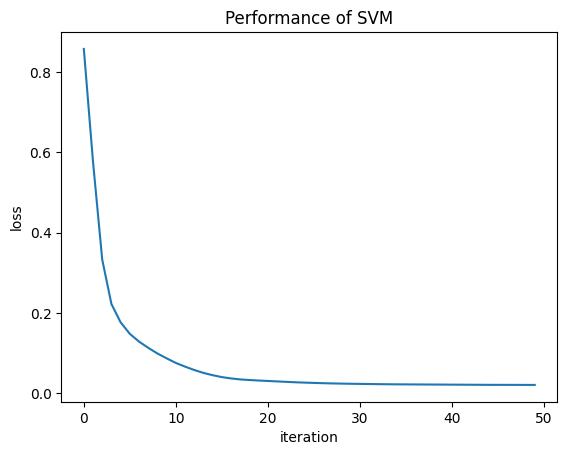

In [126]:
idx = range(0, len(model.loss))

fig, ax = plt.subplots()
ax.plot(idx, model.loss)
ax.set(xlabel="iteration",
       ylabel="loss",
       title="Performance of SVM")
plt.show()